In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Volume

In [2]:
df_volume = pd.read_csv('/content/drive/MyDrive/crops_dataset/volumes_predicted/volumes_predicted_up/barley_vol_df_up.csv')

In [3]:
df_volume.head()

,Unnamed: 0,time,actual_volume,pred_volume
0,0,2014-01-01,97958.0,4.168862e+04
1,1,2014-02-01,101502.0,5.134772e+05
2,2,2014-03-01,534782.0,1.610946e+06
3,3,2014-04-01,5515743.0,3.571196e+05
4,4,2014-05-01,1900646.0,1.520599e+05


In [4]:
df_volume = df_volume.drop(df_volume.columns[0], axis=1)

In [5]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,97958.0,4.168862e+04
1,2014-02-01,101502.0,5.134772e+05
2,2014-03-01,534782.0,1.610946e+06
3,2014-04-01,5515743.0,3.571196e+05
4,2014-05-01,1900646.0,1.520599e+05
...,...,...,...
133,2025-02-01,NaN,8.837936e+05
134,2025-03-01,NaN,2.270358e+06
135,2025-04-01,NaN,8.182700e+05
136,2025-05-01,NaN,5.161686e+05


In [6]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           138 non-null    object 
 1   actual_volume  122 non-null    float64
 2   pred_volume    138 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


# Loading the Price

In [7]:
df_price = pd.read_csv('/content/drive/MyDrive/crops_dataset/updated_crop_prices/new_barley.csv')

In [8]:
df_price.head(5)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1100.0,1150.0,1125.0,06-08-2008
1,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1160.0,1155.0,05-08-2008
2,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1050.0,1090.0,1075.0,04-08-2008
3,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,02-08-2008
4,Cuddapah,Cuddapah,Barley (Jau),Deshi,FAQ,1150.0,1175.0,1165.0,01-08-2008


In [9]:
# Now we only focus on the price part, removing the other columns

df_price = df_price[['Price Date','Modal Price (Rs./Quintal)']]

In [10]:
df_price = df_price.rename(columns={"Price Date": "Date", "Modal Price (Rs./Quintal)": "price"})

In [11]:
df_price

,Date,price
0,06-08-2008,1125.0
1,05-08-2008,1155.0
2,04-08-2008,1075.0
3,02-08-2008,1165.0
4,01-08-2008,1165.0
...,...,...
239294,19-12-2020,1610.0
239295,14-12-2020,1610.0
239296,12-12-2020,1610.0
239297,27-10-2020,1500.0


In [12]:
# Convert 'Date' column to datetime format
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%d-%m-%Y')

# Extract year and month from 'Date' column
df_price['YearMonth'] = df_price['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate average price
df_price_avg = df_price.groupby('YearMonth')['price'].mean().reset_index()

# Set day of the date to 01
df_price_avg['Date'] = df_price_avg['YearMonth'].dt.strftime('01-%m-%Y')

# Drop the 'YearMonth' column
df_price_avg = df_price_avg.drop('YearMonth', axis=1)

# Print the average price DataFrame
df_price_avg

,price,Date
0,928.602555,01-04-2008
1,958.556542,01-05-2008
2,1064.381682,01-06-2008
3,1022.466473,01-07-2008
4,990.796544,01-08-2008
...,...,...
186,1909.005793,01-10-2023
187,1953.013043,01-11-2023
188,1995.961806,01-12-2023
189,2071.573733,01-01-2024


In [13]:
df_price_avg = df_price_avg[['Date','price']]

In [14]:
df_price_avg

,Date,price
0,01-04-2008,928.602555
1,01-05-2008,958.556542
2,01-06-2008,1064.381682
3,01-07-2008,1022.466473
4,01-08-2008,990.796544
...,...,...
186,01-10-2023,1909.005793
187,01-11-2023,1953.013043
188,01-12-2023,1995.961806
189,01-01-2024,2071.573733


In [15]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,97958.0,4.168862e+04
1,2014-02-01,101502.0,5.134772e+05
2,2014-03-01,534782.0,1.610946e+06
3,2014-04-01,5515743.0,3.571196e+05
4,2014-05-01,1900646.0,1.520599e+05
...,...,...,...
133,2025-02-01,NaN,8.837936e+05
134,2025-03-01,NaN,2.270358e+06
135,2025-04-01,NaN,8.182700e+05
136,2025-05-01,NaN,5.161686e+05


In [16]:
# Extract year from 'Date' column
df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year

# Group by 'Year' and calculate the average price for the first half of each month
df_avg_yearly = df_price_avg.groupby('Year')['price'].mean().reset_index()

# Rename the columns
df_avg_yearly.columns = ['Date', 'price']



<ipython-input-16-adbe30befa55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year


In [17]:
# Print the average prices for each year
df_avg_yearly

,Date,price
0,2008,944.804653
1,2009,783.221037
2,2010,969.582058
3,2011,1076.095353
4,2012,1118.392186
5,2013,1131.556383
6,2014,1229.640487
7,2015,1227.268401
8,2016,1538.826324
9,2017,1426.580590


In [18]:
# Convert 'time' column to datetime format
df_volume['time'] = pd.to_datetime(df_volume['time'])

# Extract year from 'time' column
df_volume['Year'] = df_volume['time'].dt.year

# Calculate the average actual volume and pred volume for each year
df_volavg_yearly = df_volume.groupby('Year').agg({'actual_volume': 'mean', 'pred_volume': 'mean'}).reset_index()

# Rename the columns
df_volavg_yearly.columns = ['Date', 'Average Actual Volume', 'Average Pred Volume']



In [19]:
# Print the average values for each year
df_volavg_yearly

,Date,Average Actual Volume,Average Pred Volume
0,2014,842774.083333,250131.871461
1,2015,551651.833333,293654.674748
2,2016,268691.333333,329811.718902
3,2017,347863.333333,363625.745654
4,2018,465222.666667,396694.468297
5,2019,519997.666667,429526.112797
6,2020,388767.916667,462282.343723
7,2021,182765.083333,495014.585905
8,2022,276929.083333,527739.197367
9,2023,481417.916667,560461.381529


# Getting MSP

In [20]:
import pandas as pd

# Create a DataFrame for MSP
msp_data = {
    'Date': list(range(2008, 2025)),
    'msp': [680,750,780,980,980,1100,1150,1225,1325,1410,1440,1525,1600,1635,1735,1735,1850]
}

df_msp = pd.DataFrame(msp_data)

# Print the MSP DataFrame



In [21]:
df_msp

,Date,msp
0,2008,680
1,2009,750
2,2010,780
3,2011,980
4,2012,980
5,2013,1100
6,2014,1150
7,2015,1225
8,2016,1325
9,2017,1410


In [22]:
crop_price_df = pd.merge(df_avg_yearly, df_msp, on='Date')

In [23]:
crop_price_df


,Date,price,msp
0,2008,944.804653,680
1,2009,783.221037,750
2,2010,969.582058,780
3,2011,1076.095353,980
4,2012,1118.392186,980
5,2013,1131.556383,1100
6,2014,1229.640487,1150
7,2015,1227.268401,1225
8,2016,1538.826324,1325
9,2017,1426.580590,1410


In [24]:
# Calculate the difference between 'msp' and 'price' and add it as a new column
crop_price_df['difference'] = crop_price_df['price'] - crop_price_df['msp']


In [25]:
crop_price_df

,Date,price,msp,difference
0,2008,944.804653,680,264.804653
1,2009,783.221037,750,33.221037
2,2010,969.582058,780,189.582058
3,2011,1076.095353,980,96.095353
4,2012,1118.392186,980,138.392186
5,2013,1131.556383,1100,31.556383
6,2014,1229.640487,1150,79.640487
7,2015,1227.268401,1225,2.268401
8,2016,1538.826324,1325,213.826324
9,2017,1426.580590,1410,16.580590


# MSP and Avg_Price

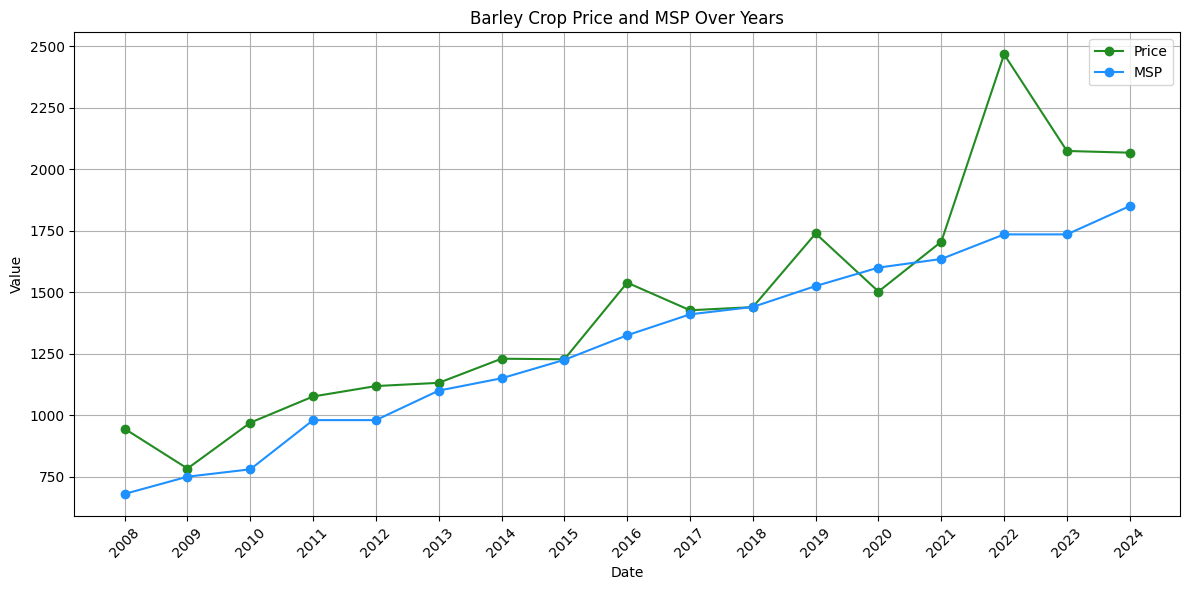

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting 'price' and 'msp' over 'Date'
plt.figure(figsize=(12, 6))
plt.plot(crop_price_df['Date'], crop_price_df['price'], marker='o', label='Price',color='forestgreen')
plt.plot(crop_price_df['Date'], crop_price_df['msp'], marker='o', label='MSP',color='dodgerblue')

# Shade the region where price is greater than msp
plt.fill_between(crop_price_df['Date'], crop_price_df['price'], crop_price_df['msp'],
                 where=crop_price_df['price'] < crop_price_df['msp'], color='yellow', alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Barley Crop Price and MSP Over Years')
plt.legend()
plt.grid(True)
plt.xticks(crop_price_df['Date'], rotation=45)
plt.tight_layout()
plt.show()

# Liability for the crop

In [32]:
liability_df = pd.merge(df_volavg_yearly, crop_price_df, on='Date', how='inner')



In [33]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference
0,2014,842774.083333,250131.871461,1229.640487,1150,79.640487
1,2015,551651.833333,293654.674748,1227.268401,1225,2.268401
2,2016,268691.333333,329811.718902,1538.826324,1325,213.826324
3,2017,347863.333333,363625.745654,1426.580590,1410,16.580590
4,2018,465222.666667,396694.468297,1439.375495,1440,-0.624505
5,2019,519997.666667,429526.112797,1738.605101,1525,213.605101
6,2020,388767.916667,462282.343723,1502.617784,1600,-97.382216
7,2021,182765.083333,495014.585905,1705.102533,1635,70.102533
8,2022,276929.083333,527739.197367,2466.999547,1735,731.999547
9,2023,481417.916667,560461.381529,2074.090697,1735,339.090697


In [34]:
# Calculate actual_liability
liability_df['actual_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Actual Volume'] if row['difference'] < 0 else np.nan, axis=1)

# Calculate pred_liability
liability_df['pred_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Pred Volume'] if row['difference'] < 0 else np.nan, axis=1)




In [35]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference,actual_liability,pred_liability
0,2014,842774.083333,250131.871461,1229.640487,1150,79.640487,NaN,NaN
1,2015,551651.833333,293654.674748,1227.268401,1225,2.268401,NaN,NaN
2,2016,268691.333333,329811.718902,1538.826324,1325,213.826324,NaN,NaN
3,2017,347863.333333,363625.745654,1426.580590,1410,16.580590,NaN,NaN
4,2018,465222.666667,396694.468297,1439.375495,1440,-0.624505,2.905338e+05,2.477376e+05
5,2019,519997.666667,429526.112797,1738.605101,1525,213.605101,NaN,NaN
6,2020,388767.916667,462282.343723,1502.617784,1600,-97.382216,3.785908e+07,4.501808e+07
7,2021,182765.083333,495014.585905,1705.102533,1635,70.102533,NaN,NaN
8,2022,276929.083333,527739.197367,2466.999547,1735,731.999547,NaN,NaN
9,2023,481417.916667,560461.381529,2074.090697,1735,339.090697,NaN,NaN


In [36]:
# Save the dataframe to a CSV file
liability_df.to_csv('barley_liability_data_up.csv', index=False)

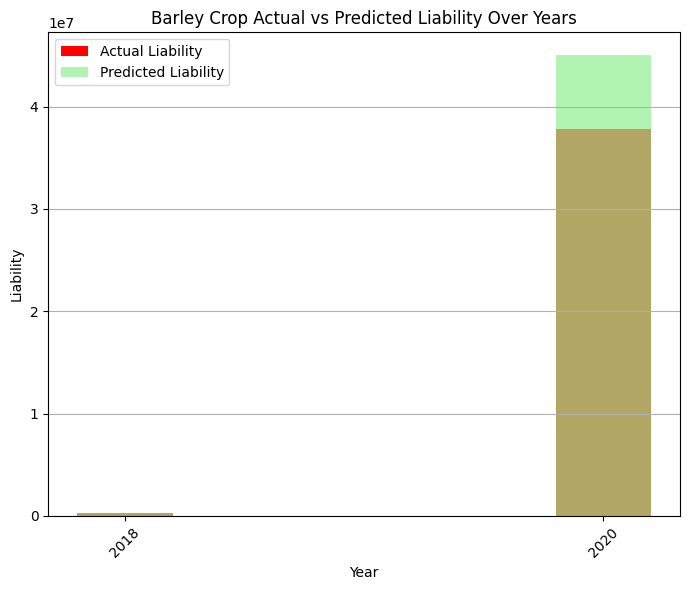

In [40]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability']
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability']
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(7, 6))
plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4,color='red')
plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4,color='lightgreen')  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability')
plt.title('Barley Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


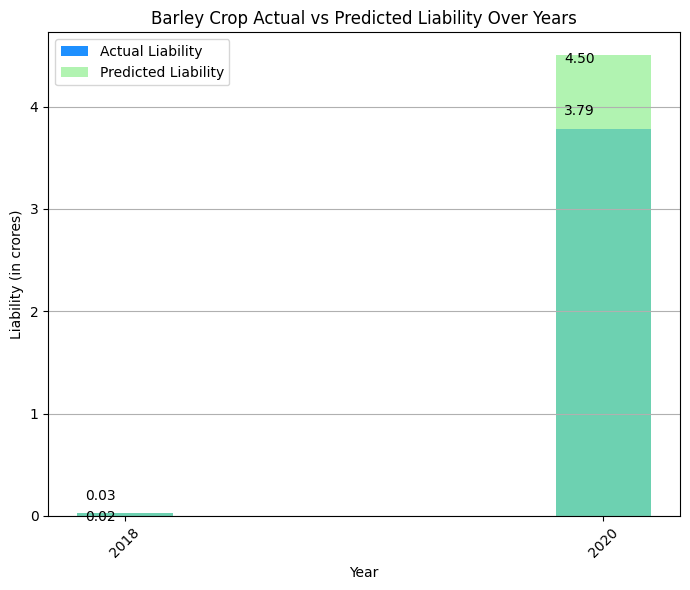

In [44]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability'] / 1e7
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability'] / 1e7
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(7, 6))
bars1 = plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4,color='dodgerblue')
bars2 = plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4,color='lightgreen')  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability (in crores)')
plt.title('Barley Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)

# Add the liability values on top of the bars
for bar, liability_values in zip(bars1, actual_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{liability_values:.2f}', ha='center', va='bottom')
for bar, liability_values in zip(bars2, pred_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.1, f'{liability_values:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
